<a href="https://colab.research.google.com/github/SirajShaikh96/Yes_bank_stock_prediction/blob/main/Yes_bank_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - YesBank_StockPrices-Prediction


##### **Project Type**    - EDA/Regression/supervised
##### **Contribution**    - Individual
##### **Project By -** Siraj Shaikh


# **Project Summary -**

This project is about Yesbank stock price analysing. In the dataframe there are
5 feature named as Date, open, high, low, close. In the given dataset Date is in string format so first we have to convert it into datetime format for Exploratory Data Analysis. 

This project is about 2018 scam happened in Yesbank, because of which stock suddenly fell from Its all time high of more than  rupees 400 to rupees 150 whithin a month.

**In this project we will analyze price distribution of Yesbank stock from 2005 to 2020, to find some insight and We will use different kind of plot to understand the data properly. Like colinear relation between data, distribution of data. Then we will train multiple regression machine learning model on the price distribution, so that in future if any other stock distribute it's price before crash, our ML model will detect it earlier. So we can reduce our exposure or square of our position on the basis of ML model recommendation.**

First check if data is normally distributed or there is any imbalance.
If there is any skewness, then we will normalize the distribution  according to the skewness.

Then data will go thhrough ML pipeline like data preprocessing, defining independent variable and dependent variable, splitting data for training and testing using train_test_split module. Then i will apply first linear model on the traning data after model get and model will predict the unseen data. Then 
the prediction will be compare on testing data to evaluate the accuracy of model and also other parameter. After that we will use regularization to see if perfomance increases or not by with Gridsearch CV for cross validation and to get best parameters.



# **GitHub Link -**

# **Problem Statement**


**B'coz of sudden fall in any stock, investors looses lot of money, This project will help them to understand the future performance of that stock.**

#### **Business Objective?**

**To make a robust machine learning model ,so it can predict future perfomance of that stock and to help our client to take decision whether to enter in this stock or not, how much return the will make, at what time to square off there position or to roll over there position.**

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [111]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
#Loading Dataset
file_path = '/content/drive/MyDrive/ML_Capstone_project/Yesbank/data_YesBank_StockPrices.csv'

In [113]:
df_yesbank = pd.read_csv(file_path)

In [114]:
# Dataset Rows & Columns count
df_yesbank.shape

(185, 5)

#Description

**Fields**                      **Description**

Date____________________________Date of records

Open____________________________Opening price

High___________________________Highest price in the month

Low____________________________Lowest price in the month

Close__________________________Occupation of the speaker

In [115]:
# Dataset First Look
df_yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# Dataset Info
df_yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
# Dataset Describe
df_yesbank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [8]:
# Dataset Duplicate Value Count
len(df_yesbank[df_yesbank.duplicated()])

0

In [9]:
# Dataset columns
df_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Missing Values/Null Values Count
df_yesbank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**This dataset has 5 columns and 185 rows. Data is about stock price distrtibution over the last 15 years. This dataset content information like at what price stock open, highest price, lowest price and closing price in that particular month**

## ***Data Wrangling, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***##

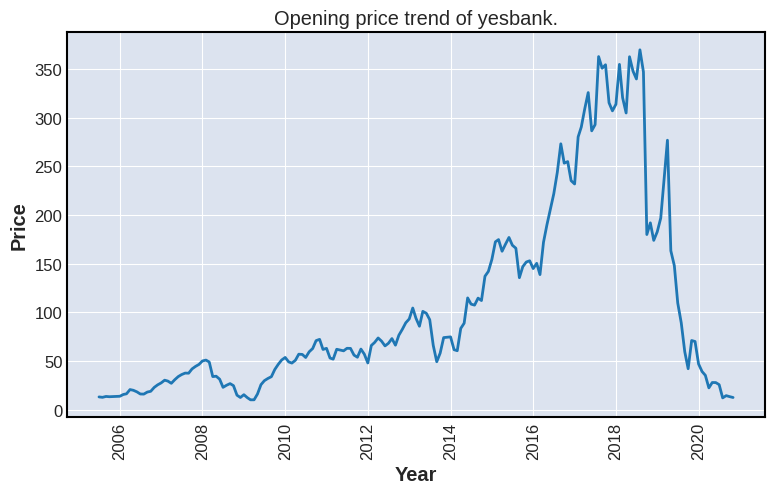

In [109]:
# Chart - 1 visualization code
plt.figure(figsize=(9,5))
x = df_yesbank['Date']
y  = df_yesbank['Open']

plt.plot(x, y)

plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Opening price trend of yesbank.')

plt.show()

**I've used line chart, it is simple and versatile, and gives basic understanding  and trend of data**

**Till 2018 August the stcok was performing good it touched it's all time high in this month and suddenly start falling, in 2020 it fell near to it's IPO price.**

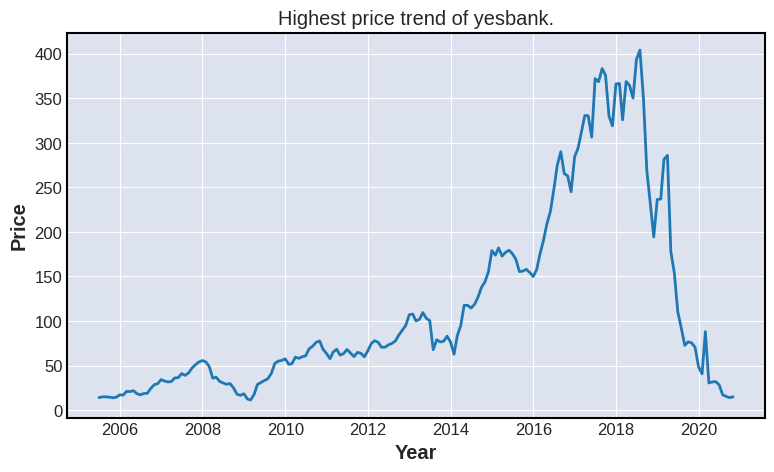

In [110]:
plt.figure(figsize=(9,5))
x = df_yesbank['Date']
y  = df_yesbank['High']

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Highest price trend of yesbank.')
plt.show()

**Through this chart we can see that stock crossed RS 400 and before falling it and before falling it made a pattern like double top.**

---



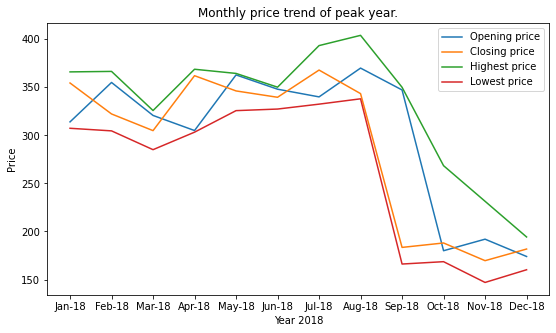

In [13]:
plt.figure(figsize=(9,5))
x = df_yesbank['Date'][150:162]
y = df_yesbank['Open'][150:162]
z = df_yesbank['Close'][150:162]
a = df_yesbank['High'][150:162]
b = df_yesbank['Low'][150:162]

plt.plot(x, y, label = 'Opening price')
plt.plot(x, z, label = 'Closing price')
plt.plot(x, a, label = 'Highest price')
plt.plot(x, b, label = 'Lowest price')

plt.xlabel('Year 2018')
plt.ylabel('Price')
plt.title('Monthly price trend of peak year.')
plt.legend()
plt.show()

**This is a mulptiple line chart, its help to visaulize the multiple data in a single chart. Through this chart comparison between different variable becomes easy.**

**Through this chart we can see that in August, stock closed near its month low. It is a sign that market is losing it's strength and may be it will go in bear phase.**

In [14]:
#Importing mplfinance
import sys
if 'google.colab' in sys.modules:
  %pip install --upgrade mplfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.1 MB/s eta 0:00:00


**This module helps to create financial plots.**

In [15]:
import mplfinance as mpf

In [16]:
#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number

from datetime import datetime

df_yesbank['Date'] = df_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

**Date was in string format and for finance plot it is very mportant to convert it in DateTime format.** 

In [17]:
df_yesbank.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [18]:
df_yesbank.head(2)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42


In [19]:
#Setting Date as index 
df_yesbank_new = df_yesbank.set_index('Date')


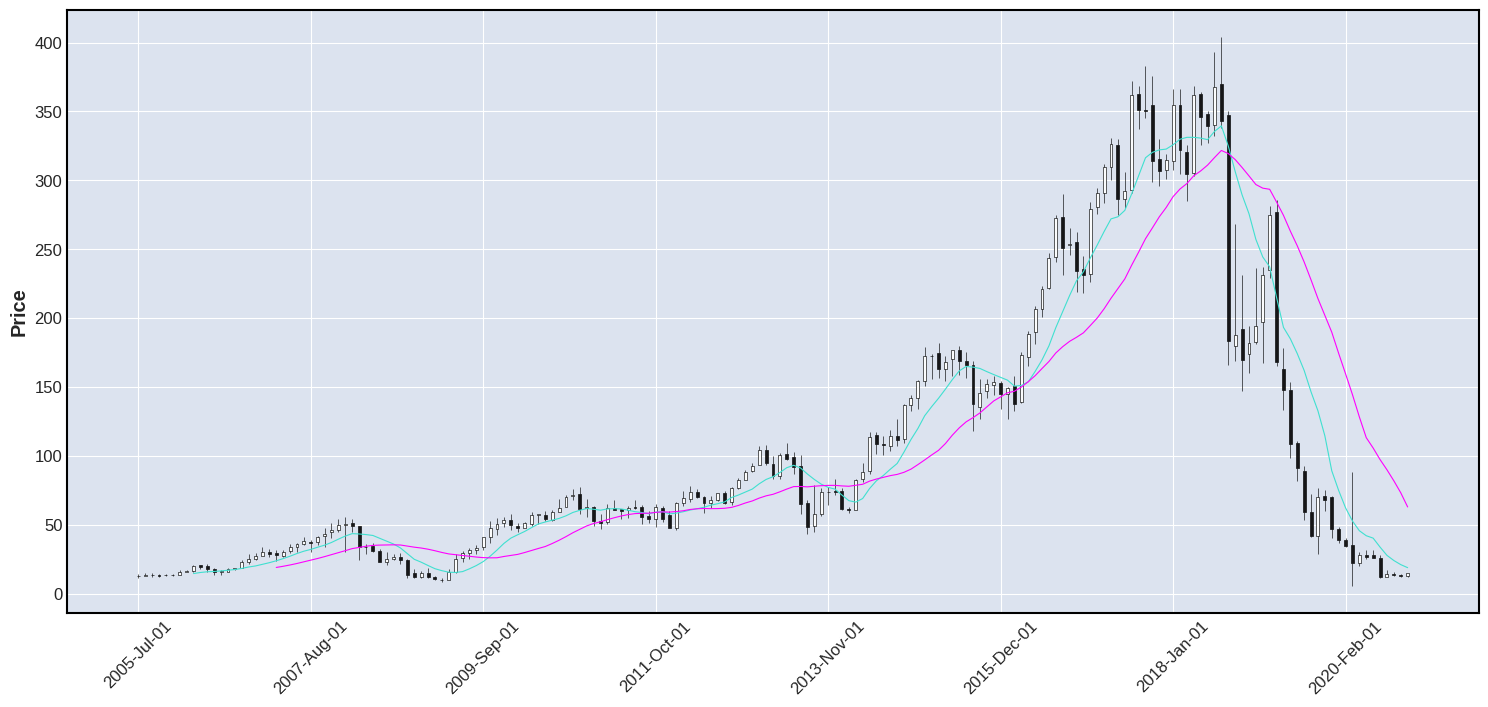

In [20]:
#Plot stock price in OHLC format  and make a analysis through moving average
mpf.plot(df_yesbank_new,type='candle',mav=(9,21), figratio=(25,11), figscale=1.5)

**This chart called OHLC (candle stick) chart it makes stock  price easy to read and understand. This chart provide lost of information in a compact way.**

**Through this chart we got very useful insight. There is two moving average one is 9 period moving average and another is 21 period moving average. Whenever 9 ma crosses 21 ma it happen's in multiple candle. Whenever 9ma crossunder 21ma, candle was weak. So market again reverse and continues in upward direction with strength, but in 2018 August the 9 ma crossed 21ma in a single negative candle, it was very big and unsual. Which show's that market lost it's strenght and crashed.**

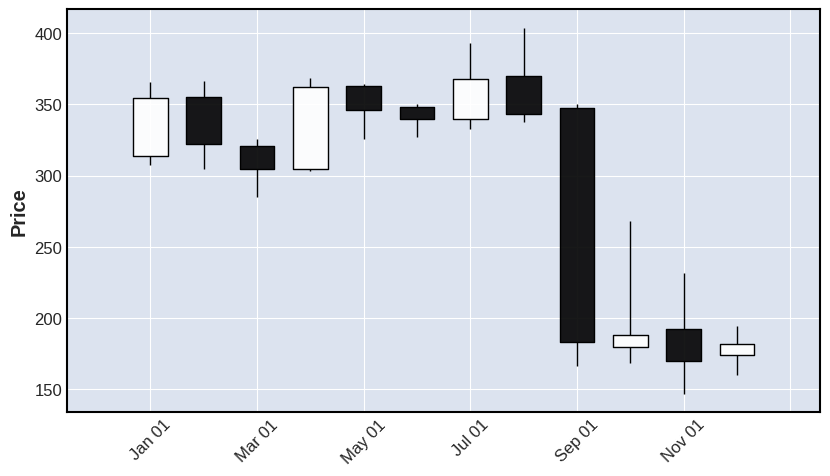

In [21]:
#2018 analysis
mpf.plot(df_yesbank_new['2018'],type='candle', figratio=(20,11))

**This chart show that in 2018 market touch's it's all time high before crashing.**

In [22]:
#Function for font
def update_font():
  font_family="Courier New"
  title_font_family="Times New Roman"
  legend_title_font_color="green"

In [23]:
#import plotly express
import plotly.express as px

fig = px.bar(df_yesbank, x="Date", y="Close",color="Close", barmode = 'stack',title='Yes Bank closing price with respect to Year')
fig.update_layout(update_font(), xaxis_title='Year', yaxis_title= 'Close Price')
fig.show()

**Plotly express is the easy to use high level interface to plotly, which operates on a variety of types of data and produces easy to style figures.**

**Plotly plot show's price distribution from 2005 to 2020. Blue to yellow shade show frequency of price.**

# Check distrtibution of data.

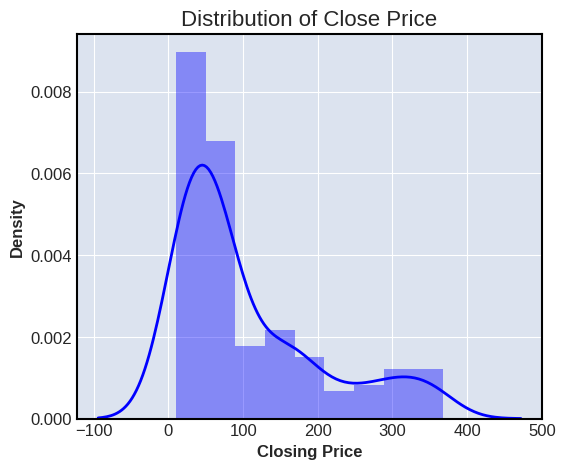

In [24]:
#plot distribution of closing price.
plt.figure(figsize=(6,5))
sns.distplot(df_yesbank['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

**This is a sns distplot used for analyzing distribution.**

**We can see that data is right skewed.**

**Use log transformation to remove skewness and make data normally distributed.**

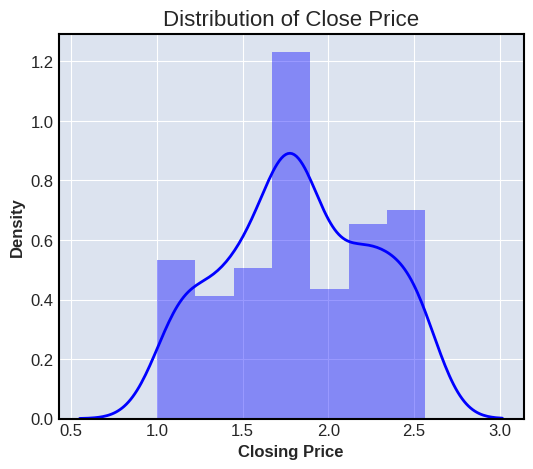

In [25]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df_yesbank['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

**Check the distribution of other data**

In [26]:
numerical_features = list(set(df_yesbank.describe().columns)-{'Close'})
numerical_features

['Low', 'High', 'Open']

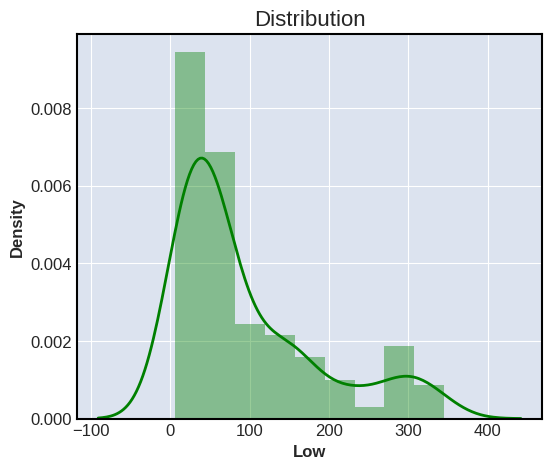

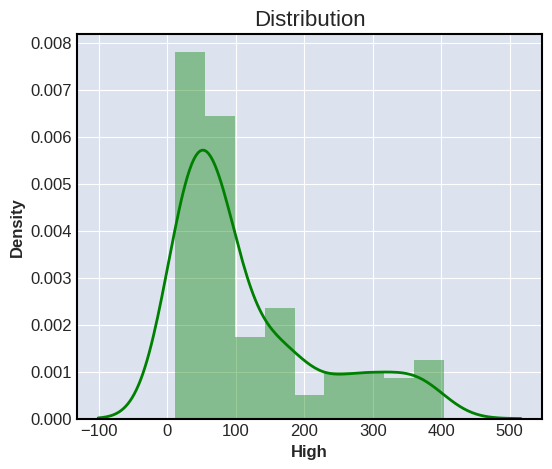

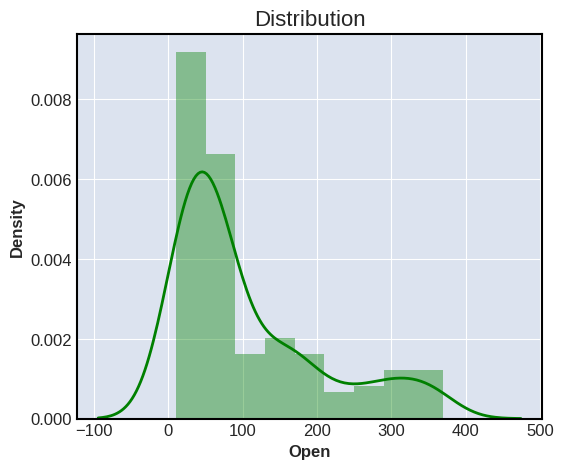

In [27]:
#use for loop for checking other 3 data.
for col in numerical_features:
  plt.figure(figsize=(6,5))
  sns.distplot(df_yesbank[col], color='green')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.show()

**We can see that all other data is also right skewed.**

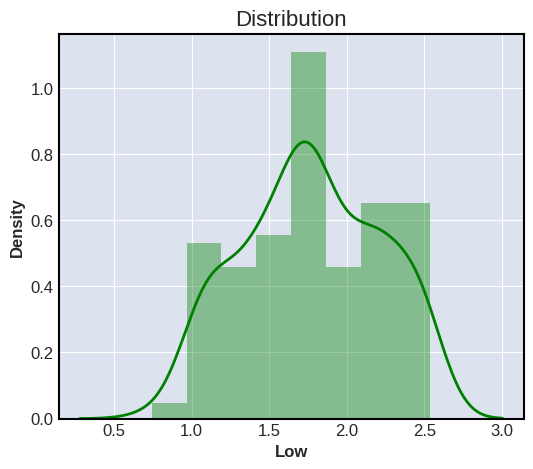

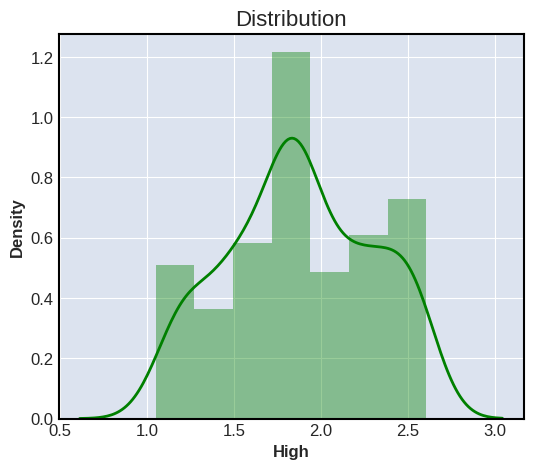

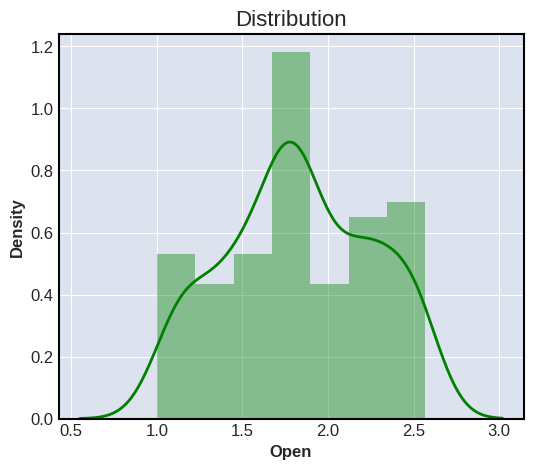

In [28]:
#Use log transformation to make data normally distributed.
for col in numerical_features:
  plt.figure(figsize=(6,5))
  sns.distplot(np.log10(df_yesbank[col]), color='green')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.show()

**After applying log10 transformation all data is become almost normally distributed.** 

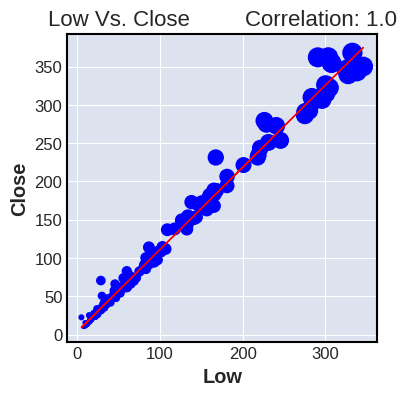

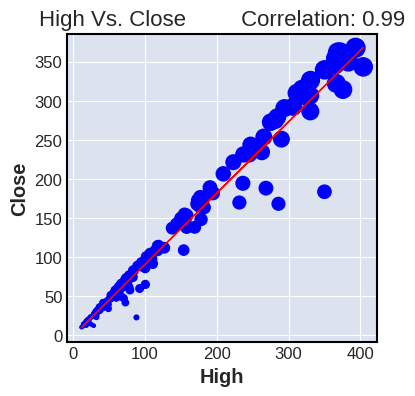

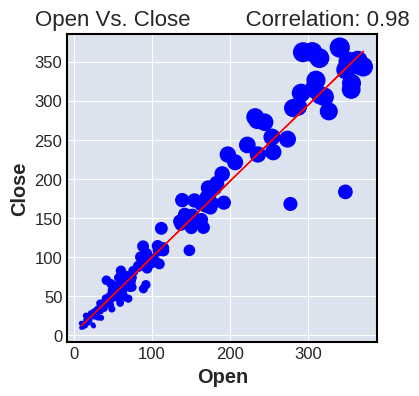

In [29]:
#Show correlation between X variable and y variable
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for col in numerical_features:
  fig = plt.figure(figsize=(4, 4))
  ax = fig.gca()
  feature = df_yesbank[col]
  label = df_yesbank['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,marker=".",c="b",s = label*2)
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
  z = np.polyfit(df_yesbank[col], df_yesbank['Close'], 1)
  y_hat = np.poly1d(z)(df_yesbank[col])

  plt.plot(df_yesbank[col], y_hat, "r", lw=1)

  plt.show()

**Correlation between y and X varaible is almost linear, except some points.**

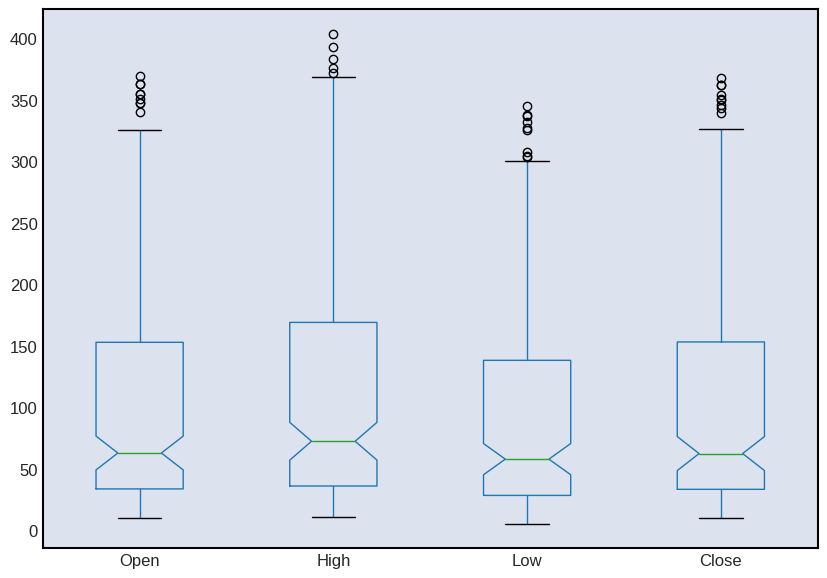

In [30]:
#Box plot
fig = plt.figure(figsize =(10, 7)),
boxplot = df_yesbank.boxplot(column=['Open','High','Low','Close'], grid=False,notch=True)
plt.show()

**As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.**

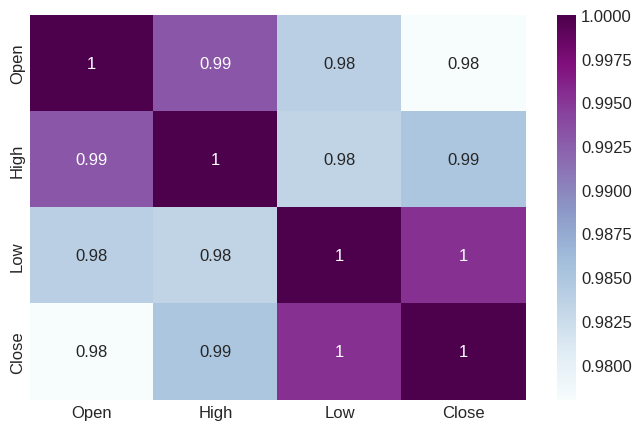

In [31]:
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

**Through heat map we can see that all features are highly correlated with each other** 

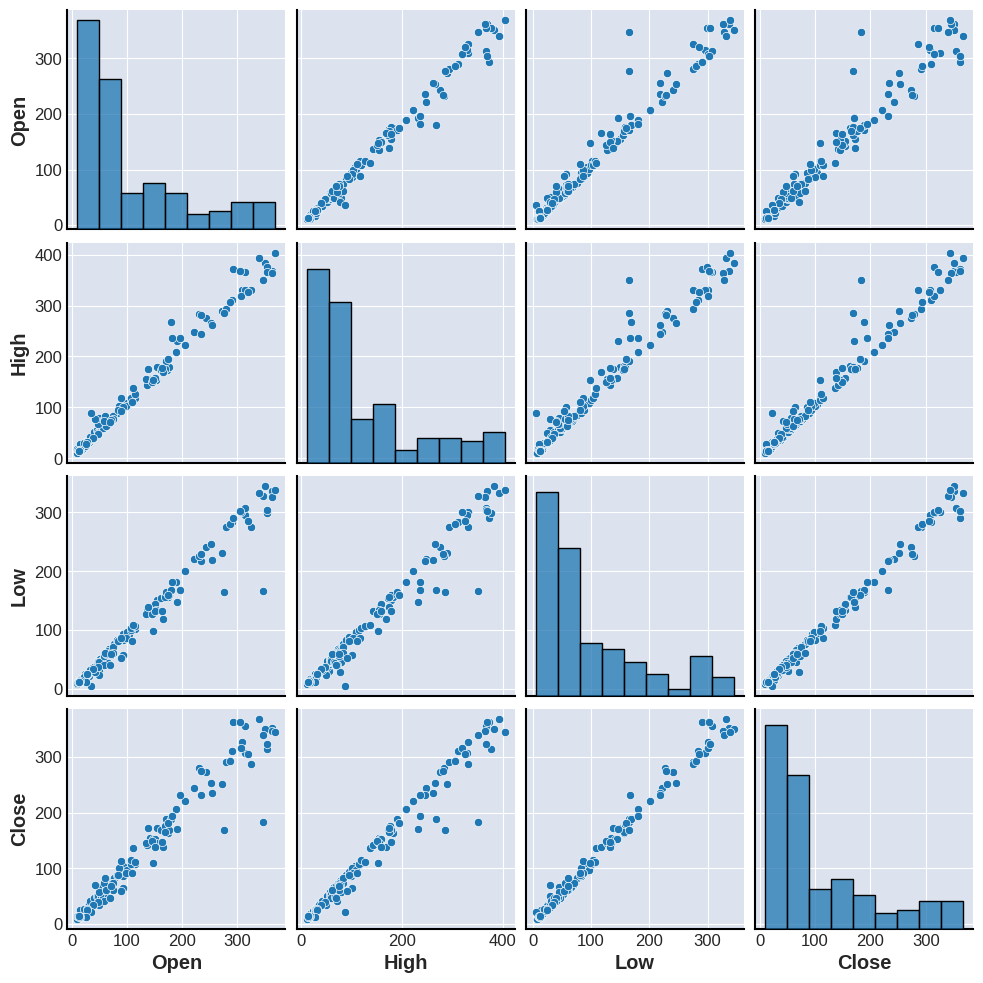

In [32]:
sns.pairplot(df_yesbank_new)

In [33]:
#import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
#function for calculating VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

#Apply calc_vif on dataset.

In [35]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


# Separating independent and dependent as X & Y.

In [36]:
#separate independent & dependent.
X = df_yesbank.drop(columns=['Close','Date'])
Y = y = df_yesbank['Close']

In [37]:
from scipy.stats import zscore

X = X.apply(zscore)
y = np.log10(y)

# Split trainnig data & testing data.

In [38]:
#Splitted training and testing dataset. Took 20% of data for testing. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [39]:
X_train.shape

(148, 3)

In [40]:
X_test.shape

(37, 3)

In [41]:
#import a linear regressor model to training  
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [42]:
#linear_reg.score will return mean accuracy of model.
round(linear_reg.score(X_train,y_train), 4)

0.8147

In [43]:
linear_reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [44]:
round(linear_reg.score(X_test,y_test), 4)

0.8226

In [45]:

y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

**In above code model predicted X_test and return an array. We will compare predicted data with unseen data.**

In [46]:
#find difference between  the estimated value and the actual value.
mean_squared_error(y_test, y_pred)

0.03158251893048738

In [47]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.17771471219481907

**One of the most commonly used measures for evualating the quality of predictions**

# Using R2 score to know how well model is fitted.

In [48]:
round(r2_score(y_test, y_pred), 4)

0.8226

**We got R2 score of 0.8226, which is good for a simple model like linear regression**

In [49]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [50]:
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [51]:
#Convert y_pred data into dataframe
test_df[' Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


**Through this adat we can see that model is predicted higher then the original value.**

In [52]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [53]:

print("MSE :",round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
R2 : 0.8226


# Plot Actual and Predicted value to visaulize were model is incorrectly predicted the data.

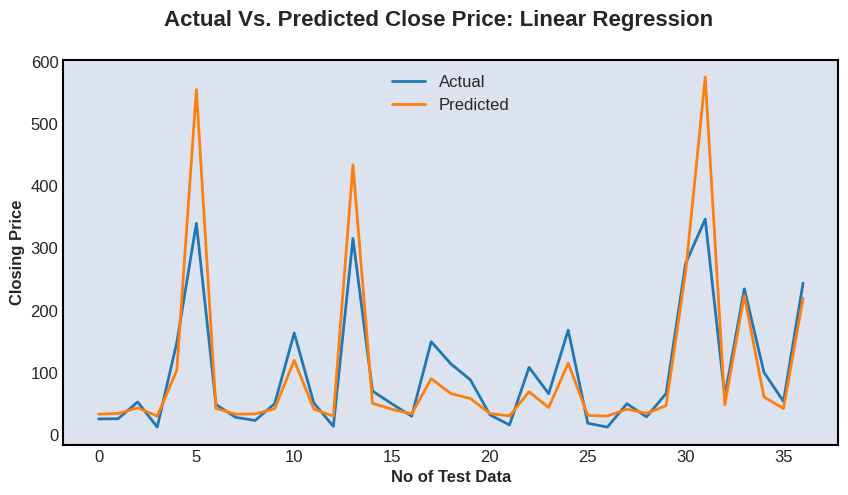

In [54]:
#Plot Actual and Predicted value
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Through visaulization we can see that model incorrectly predicted the peak.**

# Let's use regularization to see if R2 score increases or not.

In [55]:
#Import lasso regression 
from sklearn.linear_model import Lasso

In [56]:

lasso_reg = Lasso(alpha=0.1,max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [57]:
round(lasso_reg.score(X_train,y_train),4)

0.7596

In [58]:
#Again predicted x_test using lasso
y_pred_lasso = lasso_reg.predict(X_test)

In [59]:
y_pred_lasso

array([1.59885328, 1.60997773, 1.68949351, 1.56874001, 1.97344962,
       2.50656093, 1.68566448, 1.59981089, 1.60579373, 1.67686268,
       2.01562595, 1.67079926, 1.56599398, 2.42326589, 1.73700316,
       1.66886904, 1.60484921, 1.92532022, 1.82059101, 1.78055609,
       1.61048878, 1.57288435, 1.83725499, 1.68838669, 1.99972092,
       1.57880718, 1.56982374, 1.66984062, 1.61279255, 1.71366385,
       2.26101503, 2.52324602, 1.72444246, 2.22095436, 1.79381669,
       1.67767545, 2.20353159])

In [60]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [61]:

test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,39.705739
179,25.60,40.735939
66,52.59,48.920795
40,12.26,37.045888
166,147.95,94.069671


In [62]:
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0436
RMSE : 0.2088
MAE : 0.1672
MAPE : 0.1099
R2 : 0.755


**From R2 we can see that after l1 regularization accuracy is gone low.** 

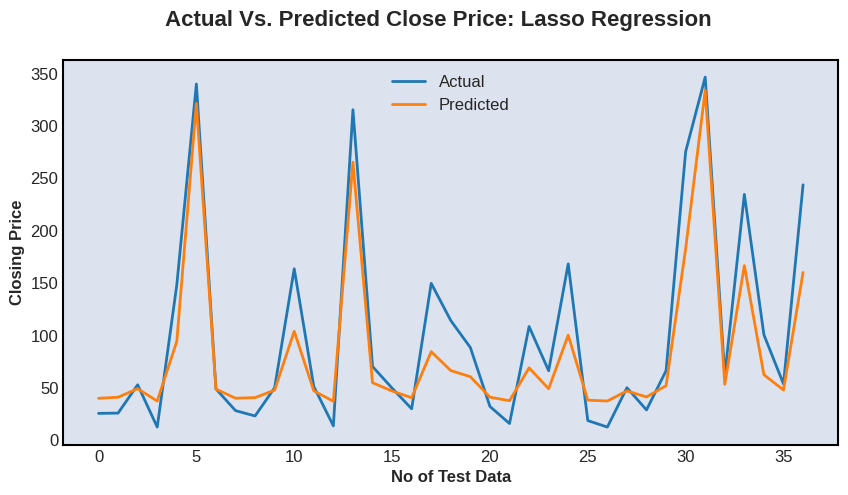

In [63]:
#plot the actual and regularized predicted value of closing price
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Through this line chart, we can see that now on an average predicted peak of closing price is low but now model is catching low's very well. Overall acuracy is low than linear regression.**





#Apply GridSearchCV to find best parameters which will increse the model accuracy.

In [64]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

**Here we used neg_mean_squared_error as a scoring metric and 3 cross validation.**

In [65]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0352


In [67]:
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [68]:
y_pred_lasso_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [69]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [70]:
test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso_cv
lasso_df = test_df.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


In [71]:
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


**R2 score we can see that after GridSearchCV lasso model's accuracy become better but linear model id still better than lasso.**

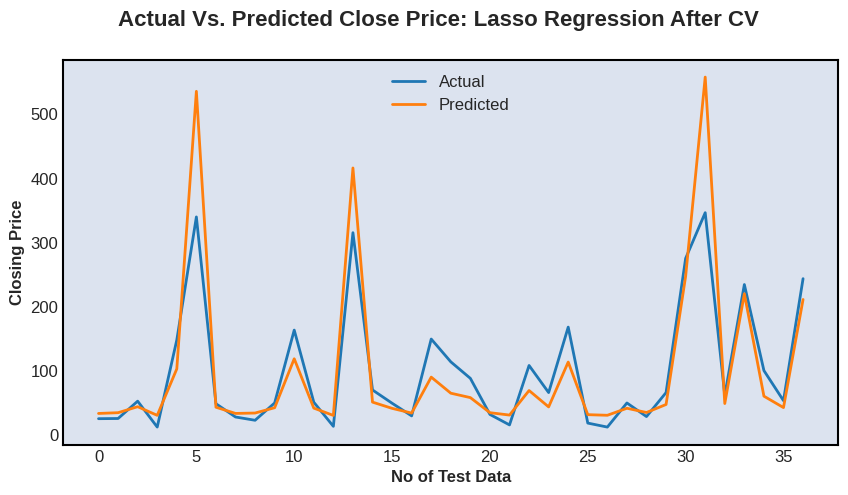

In [72]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**From this chart we can see now that low's are well predicted but peak is highly incorrectly predicted.**   

# Train model using l2 regularisation, to see if performance of model increses.

In [73]:
#import Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [74]:
round(ridge_reg.score(X_train,y_train),4)

0.8147

In [75]:
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [76]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [77]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,32.913409
179,25.60,34.050369
66,52.59,43.179458
40,12.26,29.881840
166,147.95,103.459390


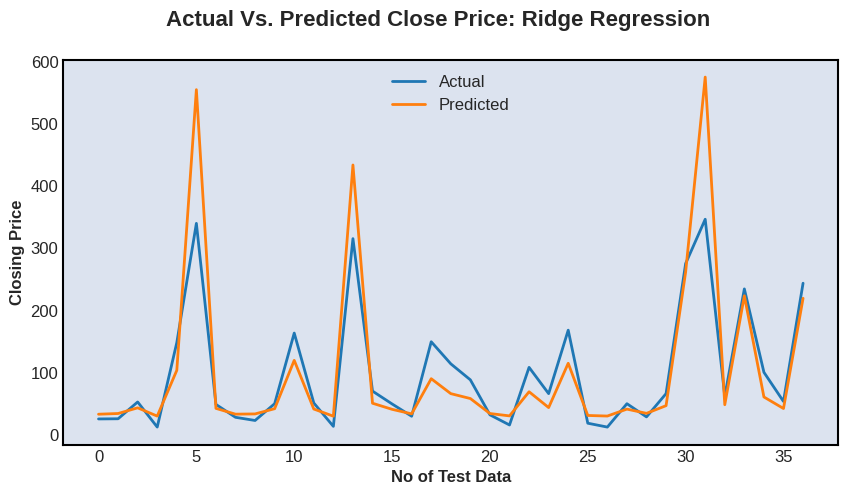

In [78]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#Apply GridSearchCV to find best parameters which will increase the model perfomance.

In [79]:
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [80]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [81]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [82]:
y_pred_ridge_cv = ridge_model_cv.predict(X_test)
y_pred_ridge_cv 

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [83]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [84]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


In [85]:
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 4))

MSE : 0.0325
RMSE : 0.1804
MAE : 0.1531
MAPE : 0.0968
R2 : 0.8172


**Through R2 score we can see that Ridge regression is better than lasso regression** 

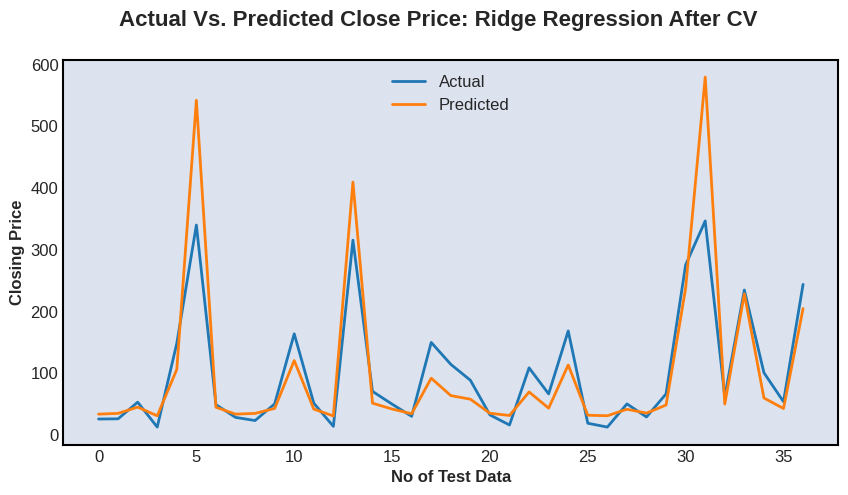

In [86]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Through this line chart, we can see that now on an average predicted peak of closing price is low but now model is catching low's very well. Overall acuracy is better than lasso regression.**





# We used l1 & l2 regularisation we can see that performance is didn't increased. Now we'll use ElasticNet to see if performance increases or not.

In [87]:
#import ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)
round(elastic.score(X_train,y_train),3)

0.796

In [88]:
y_pred_elastic = elastic.predict(X_test)
y_pred_elastic

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [89]:
np.array(y_pred)

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [90]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic
elasticnet_df = test_df.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elasticnet_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,36.380300
179,25.60,37.556885
66,52.59,46.989145
40,12.26,33.718035
166,147.95,99.879729


In [91]:
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


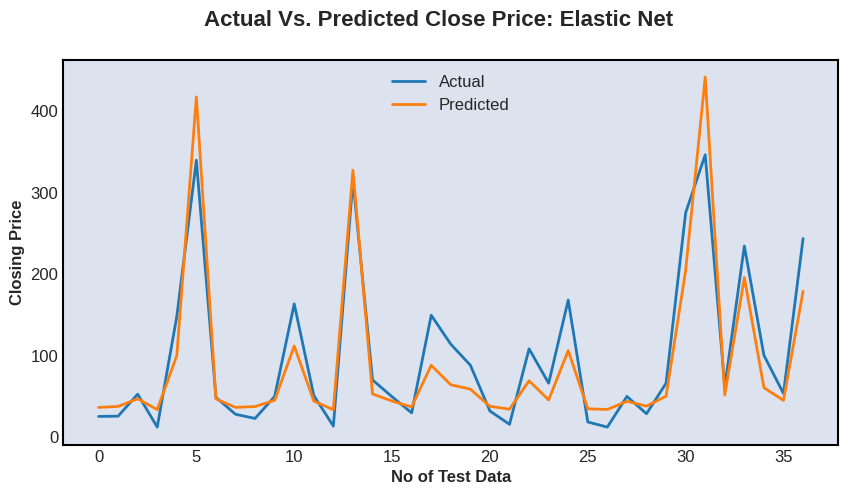

In [92]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [93]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [94]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [95]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [96]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.037


In [97]:
y_pred_elastic_cv = elastic_model_cv.predict(X_test)
y_pred_elastic_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [98]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [99]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic_cv
elastic_df = test_df.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elastic_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


In [100]:
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


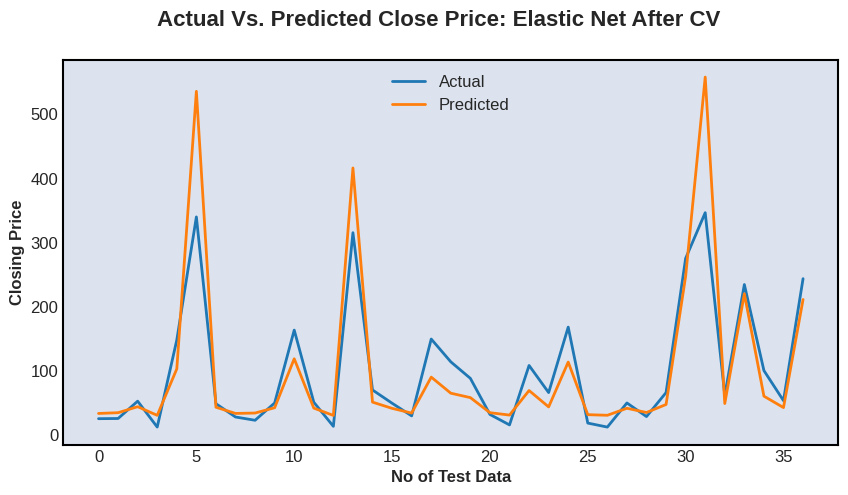

In [101]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Through all chart of linear model we can observe, that simple linear regression performed well out of all regularized linear model.**

In [102]:
df_yesbank.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


# Now let's use Decision tree for regression. 

In [103]:
#import desicion tree
from sklearn.tree import DecisionTreeRegressor

In [104]:
#select correct max_depth, so model don't get overfitted. 
clf = DecisionTreeRegressor(max_depth=6)

In [105]:
clf_model = clf.fit(X_train,y_train)
round(clf_model.score(X_train,y_train),3)

0.999

**Through R2 score we can see that DecisionTreeRegressor is giving great performance on training data, now let's see how it's perform on testing.**

In [106]:
y_pred_clf_model = clf_model.predict(X_test)
y_pred_clf_model

array([1.35755372, 1.48050864, 1.76187074, 1.1206626 , 2.23953664,
       2.55535639, 1.69215561, 1.40285371, 1.48050864, 1.69215561,
       2.23953664, 1.67499884, 1.1206626 , 2.48550639, 1.84425719,
       1.69215561, 1.42948197, 2.15438585, 1.96623303, 1.94678246,
       1.48050864, 1.1206626 , 2.03558935, 1.69215561, 2.23953664,
       1.29628777, 1.1206626 , 1.69215561, 1.48050864, 1.84425719,
       2.44575984, 2.54064648, 1.84425719, 2.36404418, 1.94678246,
       1.76187074, 2.36404418])

In [107]:
round(r2_score(y_test, y_pred_clf_model), 4)

0.9882

**Through R2 score we can see that DecisionTreeRegressor is performing great  on testing. We got very good accuracy of 98.84%.**

#Now let's plot and see that it's catching crest by using line chart

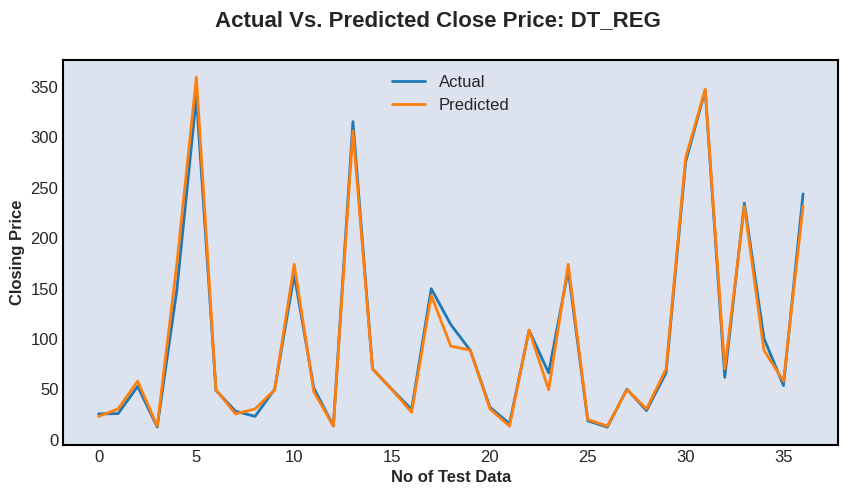

In [108]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_clf_model))
plt.suptitle('Actual Vs. Predicted Close Price: DT_REG', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**From chart also we can see that Decision Tree Regressor model got trained well and it's accuracy is better than all Linear regressor model.**

#Conclusion 

   Models-------------------Test R2 score----Train R2 score-------Conclusion



---
**Linear_regression** ---------81.47___________82.26_________It is a simple model, but is R2 scoreis good.





---

**Lasso_regression**-----------75.55___________81.9_________This is L1 regularisation model, R2 score is bit low.



---


**Ridge_regression**------------81.72___________81.47_________This is L2 regularisation model, R2 score is little bit more than Linear_regression.



---


**Elasticnet_regression**------79.55________81.9______This is also aregularisation model, R2 score is little bit more than Lasso_regression but    less than Linear_regression.



---

**Decision Tree**------------------98.84__________99.9_________This a high end model, it tend's to over fit but here R2 score is 98.84%  of test data. Which is better than every model used in this project







#In this project we've final Decision tree model, b'coz it's R2 score is 98.84% and here model accuracy is important. R2 score is the final metric we're taking into account.